# AI - ACM SummerSchool - Task3

## Part3

In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### loading data and preprocessing

In [131]:
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(np.c_[X, y], columns=np.append(iris['feature_names'], ['target']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


#### As you can see, from 150 entries, in each column, there are 150 non-null cell. Also since we are using DT as our model, scaling doesn't have that much effect on improving model(I think). So no need to preprocess

### data spliting

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3.1

In [133]:
clsfr1 = DecisionTreeClassifier(random_state=42)
clsfr1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 3.2

plotting former classifier

[Text(465.0, 830.5, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]\nclass = versicolor'),
 Text(372.0, 679.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(558.0, 679.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]\nclass = versicolor'),
 Text(372.0, 528.5, 'petal length (cm) <= 5.05\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]\nclass = versicolor'),
 Text(279.0, 377.5, 'sepal length (cm) <= 4.95\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(186.0, 226.5, 'sepal width (cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(93.0, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(279.0, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(372.0, 226.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(465.0, 377.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass

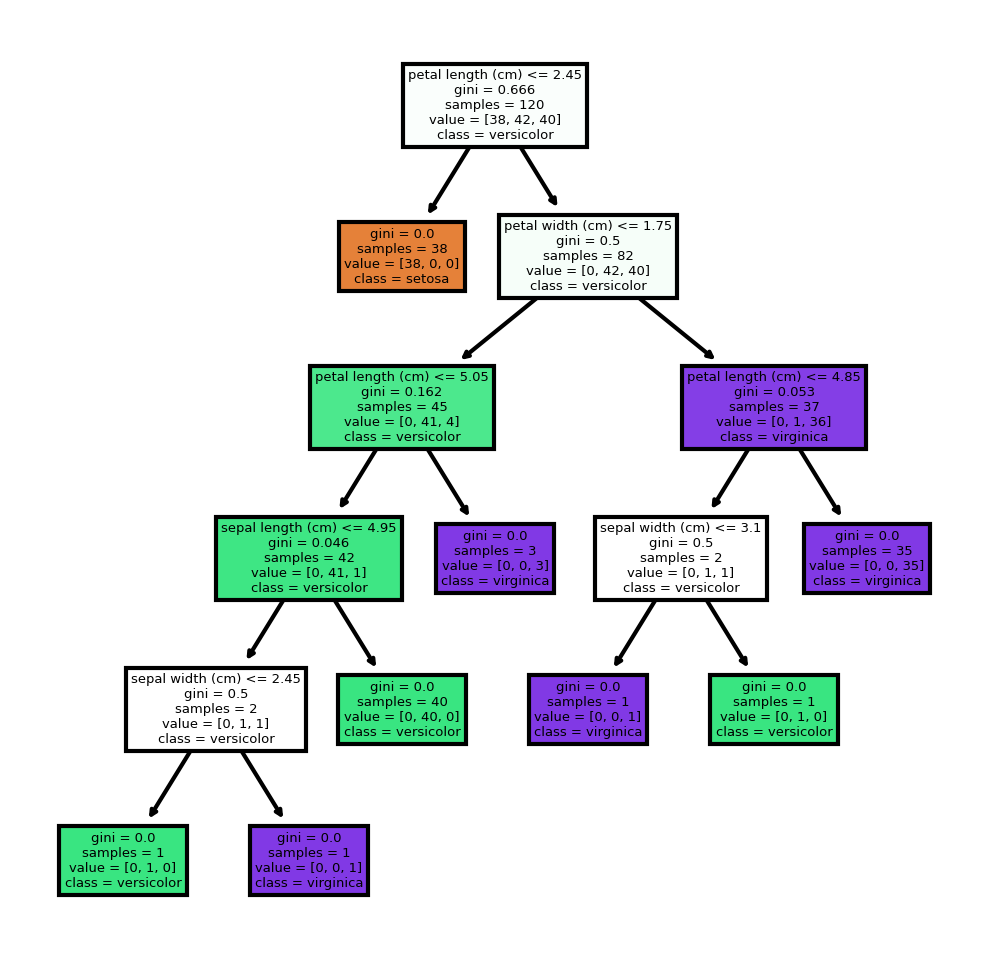

In [134]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(clsfr1, feature_names=fn, class_names=cn, filled=True)

### DT classifier with different depth

[Text(232.5, 528.5, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]\nclass = versicolor'),
 Text(155.0, 377.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(310.0, 377.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]\nclass = versicolor'),
 Text(155.0, 226.5, 'petal length (cm) <= 5.05\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]\nclass = versicolor'),
 Text(77.5, 75.5, 'gini = 0.046\nsamples = 42\nvalue = [0, 41, 1]\nclass = versicolor'),
 Text(232.5, 75.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(465.0, 226.5, 'petal length (cm) <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(387.5, 75.5, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(542.5, 75.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

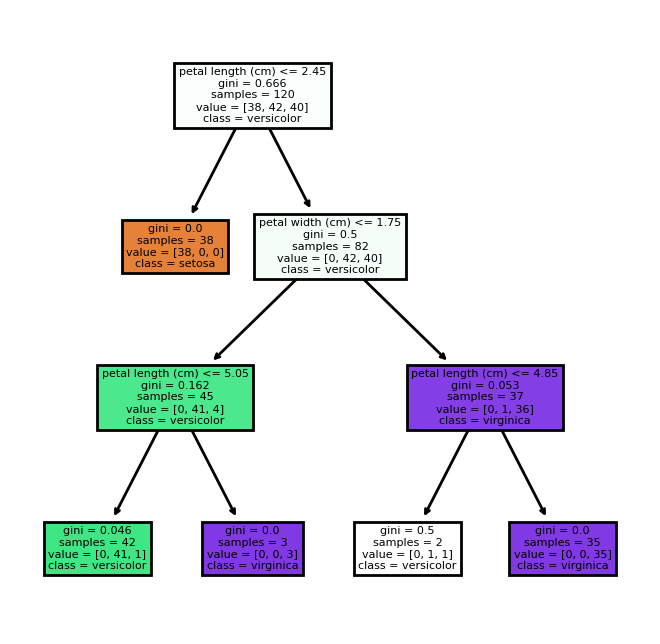

In [135]:
clsfr2 = DecisionTreeClassifier(random_state=42, max_depth=3)
clsfr2.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(clsfr2, feature_names=fn, class_names=cn, filled=True)

#### The most obvious difference between this plot and former one, is depth of trees. This DT is more simple but has more bais. In contrast former one is more complex but has less bais (and perhaps, more variance)

### 3.3

In [136]:
from sklearn.model_selection import GridSearchCV
DT_params = dict(criterion=['gini', 'entropy'], min_samples_split=range(5,15))
clsfr = DecisionTreeClassifier(random_state=42)
param_estimator = GridSearchCV(clsfr, DT_params, cv=6)
param_estimator.fit(X_train, y_train)
print(param_estimator.best_params_)

{'criterion': 'gini', 'min_samples_split': 8}


#### Instead of tuning max_depth parameter, we tune min_samples_split parameter which max_depth is depends on it

### 3.4

In [137]:
y_pred = DecisionTreeClassifier(random_state=42, min_samples_split=8, criterion='gini').fit(X_train, y_train).predict(X_test)
y_pred

array([0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 0])

In [138]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('accuracy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred, average='micro'))
print('recall: ', recall_score(y_test, y_pred, average='micro'))
print('f1: ', f1_score(y_test, y_pred, average='micro'))

accuracy:  0.9
precision:  0.9
recall:  0.9
f1:  0.9


### 3.5

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RF_params = dict(criterion=['gini', 'entropy'], min_samples_split=range(5,15), n_estimators=range(10,20), max_features=['sqrt', 'log2'])
clsfr = RandomForestClassifier(random_state=42, n_jobs=-1)
param_estimator = GridSearchCV(clsfr, RF_params, cv=6, n_jobs=-1)
param_estimator.fit(X_train, y_train)
print(param_estimator.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10}


In [140]:
DF_classifier = RandomForestClassifier(random_state=42,criterion='gini',min_samples_split=5,n_estimators=10,max_features='sqrt')
DF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=10, random_state=42)

### 3.6

In [141]:
y_pred = DF_classifier.predict(X_test)

print('accuracy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred, average='micro'))
print('recall: ', recall_score(y_test, y_pred, average='micro'))
print('f1: ', f1_score(y_test, y_pred, average='micro'))

accuracy:  0.9333333333333333
precision:  0.9333333333333333
recall:  0.9333333333333333
f1:  0.9333333333333333


### 3.7

#### According to the results of part 3.4 and 3.6, we can observe that, choosing Random Forest Classifier over Decision Tree Classifier, can lead us to better and more accurate predictive model  